# **Preparación de datos para modelado - Proyecto, Entrega 2**

________________________________________________________




Juan José Gómez Arenas

Federico García Gutiérrez

**Objetivos**

- Eliminar características fuertemente correlacionadas.
- Normalizar las variables numéricas.
- Selección de variables según criterio de negocio.

**Fecha:** Noviembre, 11 / 2023

  
  **(Cada paso sera documentado)**
________________________________________


In [ ]:
# Manipulación de datos
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import requests

#Visualización de datos perdidos
import missingno as msno


##**NYPD_Arrests_Data__Historic**

###**Carga y descripcion general de datos - Arrestos**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=1TReIr9iTIdwCYDaTbG4Tm2hunj2taHJX&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df = pd.read_csv('temp.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467074 entries, 0 to 5467073
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ARREST_DATE        object
 1   OFNS_DESC          object
 2   LAW_CAT_CD         object
 3   ARREST_BORO        object
 4   ARREST_PRECINCT    object
 5   JURISDICTION_CODE  object
 6   AGE_GROUP          object
 7   PERP_SEX           object
 8   PERP_RACE          object
dtypes: object(9)
memory usage: 375.4+ MB


###**Preparación para modelado**

En primer lugar miro las variables, para cambiar las categorias por valores númericos para cada columna

In [ ]:
df.head(5)

,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,12/04/2021,RAPE,Felony,Bronx,1035 Longwood Avenue,Patrol (NYPD),25-44,Male,WHITE HISPANIC
1,11/09/2021,SEX CRIMES,Misdemeanor,Queens,167-02 Baisley Boulevard,Patrol (NYPD),25-44,Male,BLACK
2,01/26/2019,SEX CRIMES,Felony,Manhattan,120 East 119th Street,Patrol (NYPD),45-64,Male,BLACK
3,11/10/2021,ARSON,Felony,Bronx,1035 Longwood Avenue,NO-NYPD,25-44,Male,WHITE HISPANIC
4,12/28/2021,FORGERY,Felony,Queens,167-02 Baisley Boulevard,Patrol (NYPD),18-24,Male,BLACK


###**Transformación por columna**
En este apartado se realizaran las transformaciones correspondientes de las variables (columnas) que tienen un

####**ARREST_BORO**

In [ ]:
df['ARREST_BORO'].unique()


array(['Bronx', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island'],
      dtype=object)

In [ ]:
# Define un diccionario de mapeo de borough a valores numéricos
mapeo_borough = {
    'Bronx': 1,
    'Queens': 2,
    'Manhattan': 3,
    'Brooklyn': 4,
    'Staten Island': 5,
}

# Reemplaza los valores en 'ARREST_BORO' usando el diccionario de mapeo
df['ARREST_BORO'] = df['ARREST_BORO'].map(mapeo_borough)


####**JURISDICTION_CODE**

In [ ]:
df['JURISDICTION_CODE'].unique()

array(['Patrol (NYPD)', 'NO-NYPD', 'Housing (NYPD)', 'Transit (NYPD)'],
      dtype=object)

In [ ]:
# Define un diccionario de mapeo de códigos de jurisdicción a valores numéricos
mapeo_jurisdiccion = {
    'Patrol (NYPD)': 1,
    'NO-NYPD': 2,
    'Housing (NYPD)': 3,
    'Transit (NYPD)': 4,
}

# Reemplaza los valores en 'JURISDICTION_CODE' usando el diccionario de mapeo
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].map(mapeo_jurisdiccion)


####**AGE_GROUP**

In [ ]:
df['AGE_GROUP'].unique()

array(['25-44', '45-64', '18-24', '<18', '65+', 'UNKNOWN'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de grupos de edad a valores numéricos
mapeo_edad = {
    '25-44': 1,
    '45-64': 2,
    '18-24': 3,
    '<18': 4,
    '65+': 5,
    'UNKNOWN': 6,
}

# Reemplaza los valores en 'AGE_GROUP' usando el diccionario de mapeo
df['AGE_GROUP'] = df['AGE_GROUP'].map(mapeo_edad)


####**PERP_RACE**

In [ ]:
df['PERP_RACE'].unique()


array(['WHITE HISPANIC', 'BLACK', 'WHITE', 'BLACK HISPANIC', 'UNKNOWN',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de razas a valores numéricos
mapeo_razas = {
    'WHITE HISPANIC': 1,
    'BLACK': 2,
    'WHITE': 3,
    'BLACK HISPANIC': 4,
    'UNKNOWN': 5,
    'ASIAN / PACIFIC ISLANDER': 6,
    'AMERICAN INDIAN/ALASKAN NATIVE': 7,
    'OTHER': 8,
}

# Reemplaza los valores en 'PERP_RACE' usando el diccionario de mapeo
df['PERP_RACE'] = df['PERP_RACE'].map(mapeo_razas)


####**PERP_SEX**

In [ ]:
df['PERP_SEX'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de género a valores numéricos
mapeo_genero = {
    'Male': 1,
    'Female': 2,
}

# Reemplaza los valores en 'PERP_SEX' usando el diccionario de mapeo
df['PERP_SEX'] = df['PERP_SEX'].map(mapeo_genero)


####**OFNS_DESC**

In [ ]:
#Miro para la columna OFNS_DESC
df['OFNS_DESC'].unique()

array(['RAPE', 'SEX CRIMES', 'ARSON', 'FORGERY',
       'ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
       'CRIMINAL TRESPASS', 'ANTICIPATORY OFFENSES', 'ROBBERY',
       'PROSTITUTION & RELATED OFFENSES', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'DANGEROUS DRUGS', 'FRAUDS',
       'POSSESSION OF STOLEN PROPERTY 5', 'PETIT LARCENY', 'BURGLARY',
       'FORCIBLE TOUCHING', 'OFFENSES INVOLVING FRAUD', 'THEFT-FRAUD',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'OFFENSES AGAINST THE PERSON', 'OFFENSES AGAINST PUBLIC ADMINI',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'VEHICLE AND TRAFFIC LAWS', 'JOSTLING',
       'OTHER OFFENSES RELATED TO THEFT', 'DISORDERLY CONDUCT',
       'GRAND LARCENY', 'OTHER TRAFFIC INFRACTION',
       'POSSESSION OF STOLEN PROPERTY', 'CRIMINAL MISCHIEF & RELATED OF',
       'INTOXICATED & IMPAIRED DRIVING', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'UNAUTHORIZED USE OF A VEHICLE', 'NYS LAWS-UNCLA

In [ ]:
#Reemplazo los valores
# Define un diccionario de mapeo de descripciones de ofensas a valores numéricos
mapeo_ofensas = {
    'RAPE': 1,
    'SEX CRIMES': 2,
    'ARSON': 3,
    'FORGERY': 4,
    'ASSAULT 3 & RELATED OFFENSES': 5,
    'FELONY ASSAULT': 6,
    'CRIMINAL TRESPASS': 7,
    'ANTICIPATORY OFFENSES': 8,
    'ROBBERY': 9,
    'PROSTITUTION & RELATED OFFENSES': 10,
    'DANGEROUS WEAPONS': 11,
    'MISCELLANEOUS PENAL LAW': 12,
    'DANGEROUS DRUGS': 13,
    'FRAUDS': 14,
    'POSSESSION OF STOLEN PROPERTY 5': 15,
    'PETIT LARCENY': 16,
    'BURGLARY': 17,
    'FORCIBLE TOUCHING': 18,
    'OFFENSES INVOLVING FRAUD': 19,
    'THEFT-FRAUD': 20,
    # Agrega las demás descripciones de ofensas aquí
}

# Reemplaza los valores en 'OFNS_DESC' usando el diccionario de mapeo
df['OFNS_DESC'] = df['OFNS_DESC'].map(mapeo_ofensas)


####**ARREST_PRECINCT**

In [ ]:
df['ARREST_PRECINCT'].unique()

array(['1035 Longwood Avenue', '167-02 Baisley Boulevard',
       '120 East 119th Street', '2820 Snyder Avenue',
       '480 Knickerbocker Avenue', '451 West 151st Street',
       '127 Utica Avenue', '1000 Sutter Avenue', '68-40 Austin Street',
       '16 Ericsson Place', '19 Elizabeth Street', '900 Fteley Avenue',
       '2120 Ryer Avenue', '233 West 10 Street',
       '3450 Kingsbridge Avenue', '520 West 126th Street', nan,
       '301 Gold Street', '34-16 Astoria Boulevard',
       '970 Richmond Avenue', '168-02 P.O Edward Byrne Ave.',
       '1844 Brooklyn Avenue', '333 65th Street', '164 East 102nd Street',
       '421 Empire Boulevard', '78 Richmond Terrace', '5-47 50th Avenue',
       '37-05 Union Street', '2271-89 8th Avenue', '2951 West 8th Street',
       '250 West 135th Street', '19 1/2 Pitt Street',
       '2 East 169th Street', '230 East 21st Street',
       '2877 Barkley Avenue', '2575 Coney Island Avenue',
       '16-12 Mott Avenue', '263 Tompkins Avenue', '3016 Webster 

In [ ]:
# Define un diccionario de mapeo de calles a números de presintos
mapeo_calles = {
    '16 Ericsson Place': 1,
    '19 Elizabeth Street': 5,
    '233 West 10 Street': 6,
    '19 1/2 Pitt Street': 7,
    '321 East 5 Street': 9,
    '230 West 20th Street': 10,
    '230 East 21st Street': 13,
    '357 West 35th Street': 15,
    '167 East 51st Street': 17,
    '306 West 54th Street': 18,
    '153 East 67th Street': 19,
    '120 West 82nd Street': 20,
    '86th St & Transverse Road': 21,
    '164 East 102nd Street': 23,
    '151 West 100th Street': 24,
    '120 East 119th Street': 25,
    '520 West 126th Street': 26,
    '2271-89 8th Avenue': 28,
    '451 West 151st Street': 30,
    '250 West 135th Street': 32,
    '2207 Amsterdam Avenue': 33,
    '4295 Broadway': 34,
    '257 Alexander Avenue': 40,
    '1035 Longwood Avenue': 41,
    '830 Washington Avenue': 42,
    '900 Fteley Avenue': 43,
    '2 East 169th Street': 44,
    '2877 Barkley Avenue': 45,
    '2120 Ryer Avenue': 46,
    '4111 Laconia Avenue': 47,
    '450 Cross Bronx Expressway': 48,
    '2121 Eastchester Road': 49,
    '3450 Kingsbridge Avenue': 50,
    '3016 Webster Avenue': 52,
    '2951 West 8th Street': 60,
    '2575 Coney Island Avenue': 61,
    '1925 Bath Avenue': 62,
    '1844 Brooklyn Avenue': 63,
    '5822 16th Avenue': 66,
    '2820 Snyder Avenue': 67,
    '333 65th Street': 68,
    '9720 Foster Avenue': 69,
    '154 Lawrence Avenue': 70,
    '421 Empire Boulevard': 71,
    '830 4th Avenue': 72,
    '1470 East New York Avenue': 73,
    '1000 Sutter Avenue': 75,
    '191 Union Street': 76,
    '127 Utica Avenue': 77,
    '65 6th Avenue': 78,
    '263 Tompkins Avenue': 79,
    '30 Ralph Avenue': 81,
    '480 Knickerbocker Avenue': 83,
    '301 Gold Street': 84,
    '298 Classon Avenue': 88,
    '211 Union Avenue': 90,
    '100 Meserole Avenue': 94,
    '92-24 Rockaway Beach Boulevard': 100,
    '16-12 Mott Avenue': 101,
    '87-34 118th Street': 102,
    '168-02 P.O Edward Byrne Ave.': 103,
    '64-2 Catalpa Avenue': 104,
    '92-08 222nd Street': 105,
    '103-53 101st Street': 106,
    '71-01 Parsons Boulevard': 107,
    '5-47 50th Avenue': 108,
    '37-05 Union Street': 109,
    '94-41 43rd Avenue': 110,
    '45-06 215th Street': 111,
    '68-40 Austin Street': 112,
    '167-02 Baisley Boulevard': 113,
    '34-16 Astoria Boulevard': 114,
    '92-15 Northern Boulevard': 115,
    '78 Richmond Terrace': 120,
    '970 Richmond Avenue': 121,
    '2320 Hylan Boulevard': 122,
    '116 Main Street': 123
}

# Reemplaza los valores en 'ARREST_PRECINCT' usando el diccionario de mapeo
df['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].map(mapeo_calles)


####**LAW_CAT_CD**

In [ ]:
df['LAW_CAT_CD'].unique()

array(['Felony', 'Misdemeanor', 'Violation', 'I'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de categorías de leyes a valores numéricos
mapeo_law_cat = {
    'Felony': 1,
    'Misdemeanor': 2,
    'Violation': 3,
    'I': 4,
}

# Reemplaza los valores en 'LAW_CAT_CD' usando el diccionario de mapeo
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].map(mapeo_law_cat)


###**Resultados y relación variables**

In [ ]:
df.head(5)

,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,12/04/2021,1.0,1,1,41.0,1,1,1,1
1,11/09/2021,2.0,2,2,113.0,1,1,1,2
2,01/26/2019,2.0,1,3,25.0,1,2,1,2
3,11/10/2021,3.0,1,1,41.0,2,1,1,1
4,12/28/2021,4.0,1,2,113.0,1,3,1,2


<ipython-input-109-19550f41cc97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)


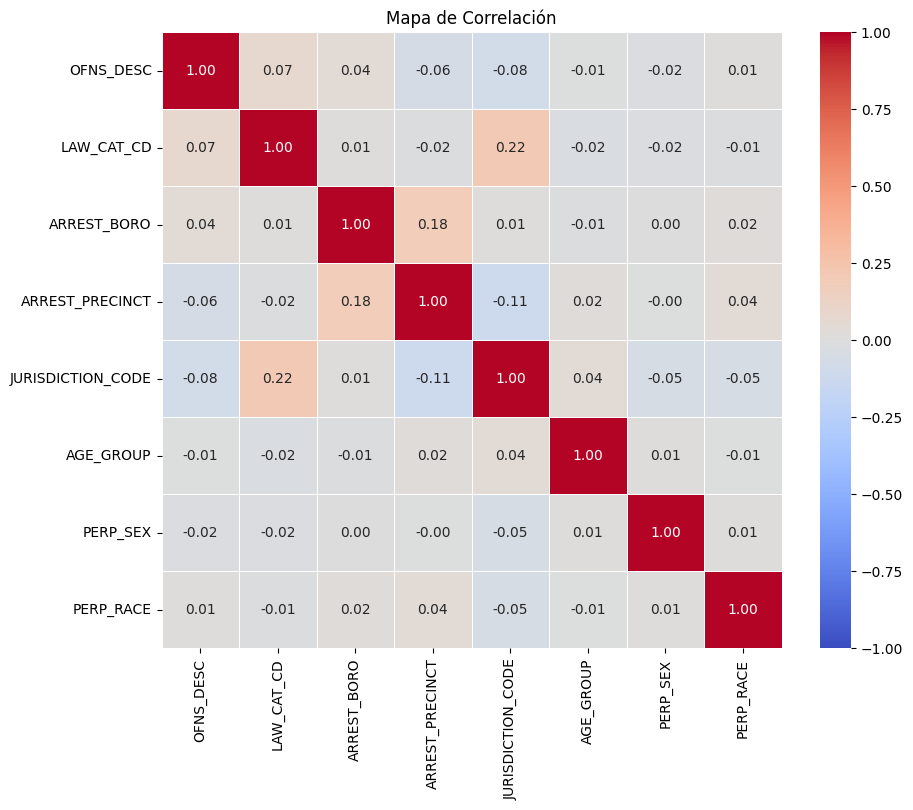

In [ ]:
# Crea un mapa de correlación con valores en el rango de -1 a 1.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

###**Carga y descripcion general de datos - Colisiones(Choques)**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=1BEq0gfmAOJlz8syzE7Ftp17T3h6wcMjI&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df2 = pd.read_csv('temp.csv')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039259 entries, 0 to 2039258
Data columns (total 13 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   NUMBER OF PERSONS INJURED      float64
 4   NUMBER OF PERSONS KILLED       float64
 5   NUMBER OF PEDESTRIANS INJURED  int64  
 6   NUMBER OF PEDESTRIANS KILLED   int64  
 7   NUMBER OF CYCLIST INJURED      int64  
 8   NUMBER OF CYCLIST KILLED       int64  
 9   NUMBER OF MOTORIST INJURED     int64  
 10  NUMBER OF MOTORIST KILLED      int64  
 11  NUMBER OF VEHICLES IN CRASH    int64  
 12  REFERENCE STREET               object 
dtypes: float64(2), int64(7), object(4)
memory usage: 202.3+ MB


###**Transformación por columna**
En este apartado se realizaran las transformaciones correspondientes de las variables (columnas) que tienen una categoria a números que representen dicha categoría.

####**BUROUGH**

In [ ]:
df2['BOROUGH'].unique()

array(['UNKNOWN', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS',
       'STATEN ISLAND'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de borough a valores numéricos
mapeo_borough2 = {
    'BRONX': 1,
    'QUEENS': 2,
    'MANHATTAN': 3,
    'BROOKLYN': 4,
    'STATEN ISLAND': 5,
    'UNKNOWN': 6
}

# Reemplaza los valores en 'ARREST_BORO' usando el diccionario de mapeo
df2['BOROUGH'] = df2['BOROUGH'].map(mapeo_borough2)


###**Resultados y relación variables**

<ipython-input-28-a4e0b46a4735>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)


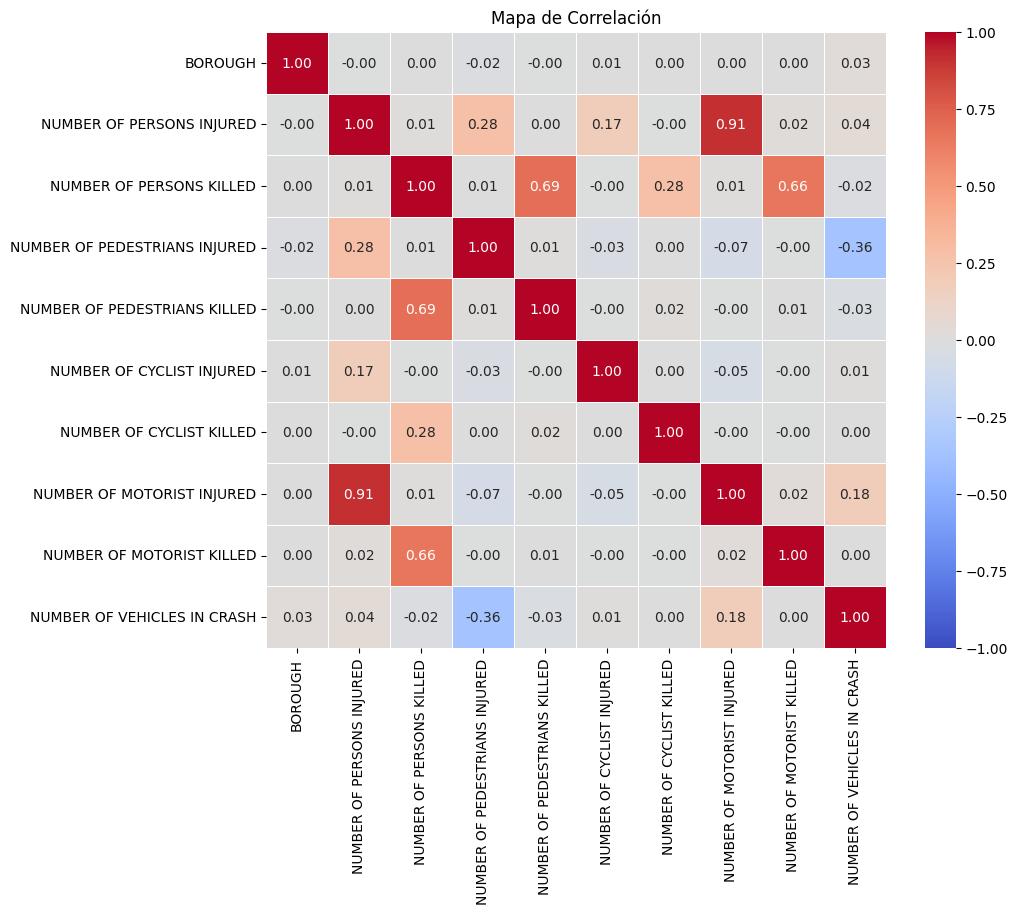

In [ ]:
# Crea un mapa de correlación con valores en el rango de -1 a 1.
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

##**Motor_Vehicle_Collisions_-_Person**

###**Carga y descripcion general de datos - Colisiones(Personas)**

In [ ]:
# Leer los datos desde un archivo csv

url = 'https://drive.google.com/uc?id=1fdGPYSnyNqOmlBZn3rzXLgkKPwlztuos&confirm=t'

# Descargar en archivo temporal
with open('temp.csv', 'wb') as f:
    f.write(requests.get(url).content)

# Leer en Dataframe
df3 = pd.read_csv('temp.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193416 entries, 0 to 5193415
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CRASH_DATE           object 
 1   CRASH_TIME           object 
 2   PERSON_TYPE          object 
 3   PERSON_INJURY        object 
 4   PERSON_AGE           float64
 5   EMOTIONAL_STATUS     object 
 6   BODILY_INJURY        object 
 7   POSITION_IN_VEHICLE  object 
 8   SAFETY_EQUIPMENT     object 
 9   COMPLAINT            object 
 10  PED_ROLE             object 
 11  PERSON_SEX           object 
dtypes: float64(1), object(11)
memory usage: 475.5+ MB


###**Transformación por columna**
En este apartado se realizaran las transformaciones correspondientes de las variables (columnas) que tienen una categoria a números que representen dicha categoría.

####**PERSON_TYPE**

In [ ]:
df3['PERSON_TYPE'].unique()

array(['Occupant', 'Pedestrian', 'Bicyclist', 'Other Motorized'],
      dtype=object)

In [ ]:
# Define un diccionario de mapeo de tipos de persona a valores numéricos
mapeo_persona = {
    'Occupant': 1,
    'Pedestrian': 2,
    'Bicyclist': 3,
    'Other Motorized': 4
}

# Reemplaza los valores en 'PERSON_TYPE' usando el diccionario de mapeo
df3['PERSON_TYPE'] = df3['PERSON_TYPE'].map(mapeo_persona)


####**PERSON_INJURY**

In [ ]:
df3['PERSON_INJURY'].unique()

array([1, 2, 3])

In [ ]:
# Define un diccionario de mapeo de lesiones de personas a valores numéricos
mapeo_lesiones = {
    'Unspecified': 1,
    'Injured': 2,
    'Killed': 3
}

# Reemplaza los valores en 'PERSON_INJURY' usando el diccionario de mapeo
df3['PERSON_INJURY'] = df3['PERSON_INJURY'].map(mapeo_lesiones)


####**EMOTIONAL_STATUS**

In [ ]:
df3['EMOTIONAL_STATUS'].unique()

array(['Unknown', 'Does Not Apply', 'Conscious', 'Shock', 'Incoherent',
       'Semiconscious', 'Apparent Death', 'Unconscious'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de estados emocionales a valores numéricos
mapeo_emocional = {
    'Unknown': 1,
    'Does Not Apply': 2,
    'Conscious': 3,
    'Shock': 4,
    'Incoherent': 5,
    'Semiconscious': 6,
    'Apparent Death': 7,
    'Unconscious': 8
}

# Reemplaza los valores en 'EMOTIONAL_STATUS' usando el diccionario de mapeo
df3['EMOTIONAL_STATUS'] = df3['EMOTIONAL_STATUS'].map(mapeo_emocional)


####**BODILY_INJURY**

In [ ]:
df3['BODILY_INJURY'].unique()

array(['Unknown', 'Does Not Apply', 'Back', 'Shoulder - Upper Arm',
       'Knee-Lower Leg Foot', 'Head', 'Elbow-Lower-Arm-Hand', 'Chest',
       'Neck', 'Hip-Upper Leg', 'Entire Body', 'Abdomen - Pelvis', 'Face',
       'Eye'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de lesiones corporales a valores numéricos
mapeo_lesiones_corporales = {
    'Unknown': 1,
    'Does Not Apply': 2,
    'Back': 3,
    'Shoulder - Upper Arm': 4,
    'Knee-Lower Leg Foot': 5,
    'Head': 6,
    'Elbow-Lower-Arm-Hand': 7,
    'Chest': 8,
    'Neck': 9,
    'Hip-Upper Leg': 10,
    'Entire Body': 11,
    'Abdomen - Pelvis': 12,
    'Face': 13,
    'Eye': 14
}

# Reemplaza los valores en 'BODILY_INJURY' usando el diccionario de mapeo
df3['BODILY_INJURY'] = df3['BODILY_INJURY'].map(mapeo_lesiones_corporales)


####**POSITION_IN_VEHICLE**

In [ ]:
df3['POSITION_IN_VEHICLE'].unique()

array(['Unknown',
       'Front passenger, if two or more persons, including the driver, are in the front seat',
       'Right rear passenger or motorcycle sidecar passenger', 'Driver',
       'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile',
       'Middle front seat, or passenger lying across a seat',
       'Middle rear seat, or passenger lying across a seat',
       'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc',
       'Does Not Apply', 'Riding/Hanging on Outside',
       'If one person is seated on another person&apos;s lap'],
      dtype=object)

In [ ]:
# Define un diccionario de mapeo de posiciones en el vehículo a valores numéricos
mapeo_posicion_vehiculo = {
    'Unknown': 1,
    'Front passenger, if two or more persons, including the driver, are in the front seat': 2,
    'Right rear passenger or motorcycle sidecar passenger': 3,
    'Driver': 4,
    'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile': 5,
    'Middle front seat, or passenger lying across a seat': 6,
    'Middle rear seat, or passenger lying across a seat': 7,
    'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc': 8,
    'Does Not Apply': 9,
    'Riding/Hanging on Outside': 10,
    'If one person is seated on another person&apos;s lap': 11
}

# Reemplaza los valores en 'POSITION_IN_VEHICLE' usando el diccionario de mapeo
df3['POSITION_IN_VEHICLE'] = df3['POSITION_IN_VEHICLE'].map(mapeo_posicion_vehiculo)


####**SAFETY_EQUIPMENT**

In [ ]:
df3['SAFETY_EQUIPMENT'].unique()

array(['Unknown', 'Lap Belt & Harness', 'Lap Belt', 'None', 'Other',
       'Child Restraint Only', 'Helmet Only (In-Line Skater/Bicyclist)',
       'Helmet (Motorcycle Only)', 'Air Bag Deployed/Lap Belt/Harness',
       '-', 'Air Bag Deployed', 'Air Bag Deployed/Lap Belt',
       'Helmet/Other (In-Line Skater/Bicyclist)', 'Harness',
       'Air Bag Deployed/Child Restraint',
       'Stoppers Only (In-Line Skater/Bicyclist)',
       'Pads Only (In-Line Skater/Bicyclist)', 'Lap Belt/Harness'],
      dtype=object)

In [ ]:
# Define un diccionario de mapeo de equipos de seguridad a valores numéricos
mapeo_equipo_seguridad = {
    'Unknown': 1,
    'Lap Belt & Harness': 2,
    'Lap Belt': 3,
    'None': 4,
    'Other': 5,
    'Child Restraint Only': 6,
    'Helmet Only (In-Line Skater/Bicyclist)': 7,
    'Helmet (Motorcycle Only)': 8,
    'Air Bag Deployed/Lap Belt/Harness': 9,
    '-': 10,
    'Air Bag Deployed': 11,
    'Air Bag Deployed/Lap Belt': 12,
    'Helmet/Other (In-Line Skater/Bicyclist)': 13,
    'Harness': 14,
    'Air Bag Deployed/Child Restraint': 15,
    'Stoppers Only (In-Line Skater/Bicyclist)': 16,
    'Pads Only (In-Line Skater/Bicyclist)': 17,
    'Lap Belt/Harness': 18
}

# Reemplaza los valores en 'SAFETY_EQUIPMENT' usando el diccionario de mapeo
df3['SAFETY_EQUIPMENT'] = df3['SAFETY_EQUIPMENT'].map(mapeo_equipo_seguridad)


####**COMPLAINT**

In [ ]:
df3['COMPLAINT'].unique()

array(['Unknown', 'Does Not Apply', 'Complaint of Pain or Nausea',
       'None Visible', 'Internal', 'Whiplash', 'Minor Bleeding',
       'Contusion - Bruise', 'Abrasion', 'Complaint of Pain',
       'Crush Injuries', 'Fracture - Distorted - Dislocation',
       'Concussion', 'Severe Bleeding', 'Minor Burn', 'Moderate Burn',
       'Severe Lacerations', 'Fracture - Dislocation', 'Amputation',
       'Severe Burn', 'Paralysis'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de quejas a valores numéricos
mapeo_quejas = {
    'Unknown': 1,
    'Does Not Apply': 2,
    'Complaint of Pain or Nausea': 3,
    'None Visible': 4,
    'Internal': 5,
    'Whiplash': 6,
    'Minor Bleeding': 7,
    'Contusion - Bruise': 8,
    'Abrasion': 9,
    'Complaint of Pain': 10,
    'Crush Injuries': 11,
    'Fracture - Distorted - Dislocation': 12,
    'Concussion': 13,
    'Severe Bleeding': 14,
    'Minor Burn': 15,
    'Moderate Burn': 16,
    'Severe Lacerations': 17,
    'Fracture - Dislocation': 18,
    'Amputation': 19,
    'Severe Burn': 20,
    'Paralysis': 21
}

# Reemplaza los valores en 'COMPLAINT' usando el diccionario de mapeo
df3['COMPLAINT'] = df3['COMPLAINT'].map(mapeo_quejas)


####**PED_ROLE**

In [ ]:
df3['PED_ROLE'].unique()

array(['Registrant', 'Passenger', 'Notified Person', 'Driver',
       'Pedestrian', 'Witness', 'Policy Holder', 'Owner', 'Other', nan,
       'In-Line Skater'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de roles de peatones a valores numéricos
mapeo_ped_role = {
    'Registrant': 1,
    'Passenger': 2,
    'Notified Person': 3,
    'Driver': 4,
    'Pedestrian': 5,
    'Witness': 6,
    'Policy Holder': 7,
    'Owner': 8,
    'Other': 9,
    'In-Line Skater': 10
}

# Reemplaza los valores en 'PED_ROLE' usando el diccionario de mapeo
df3['PED_ROLE'] = df3['PED_ROLE'].map(mapeo_ped_role)


####**PERSON_SEX**

In [ ]:
df3['PERSON_SEX'].unique()

array(['Unidentified', 'Female', 'Male'], dtype=object)

In [ ]:
# Define un diccionario de mapeo de género de personas a valores numéricos
mapeo_genero_persona = {
    'Unidentified': 3,
    'Female': 2,
    'Male': 1
}

# Reemplaza los valores en 'PERSON_SEX' usando el diccionario de mapeo
df3['PERSON_SEX'] = df3['PERSON_SEX'].map(mapeo_genero_persona)


###**Resultados y relación variables**

<ipython-input-50-ab84fb3c7539>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)


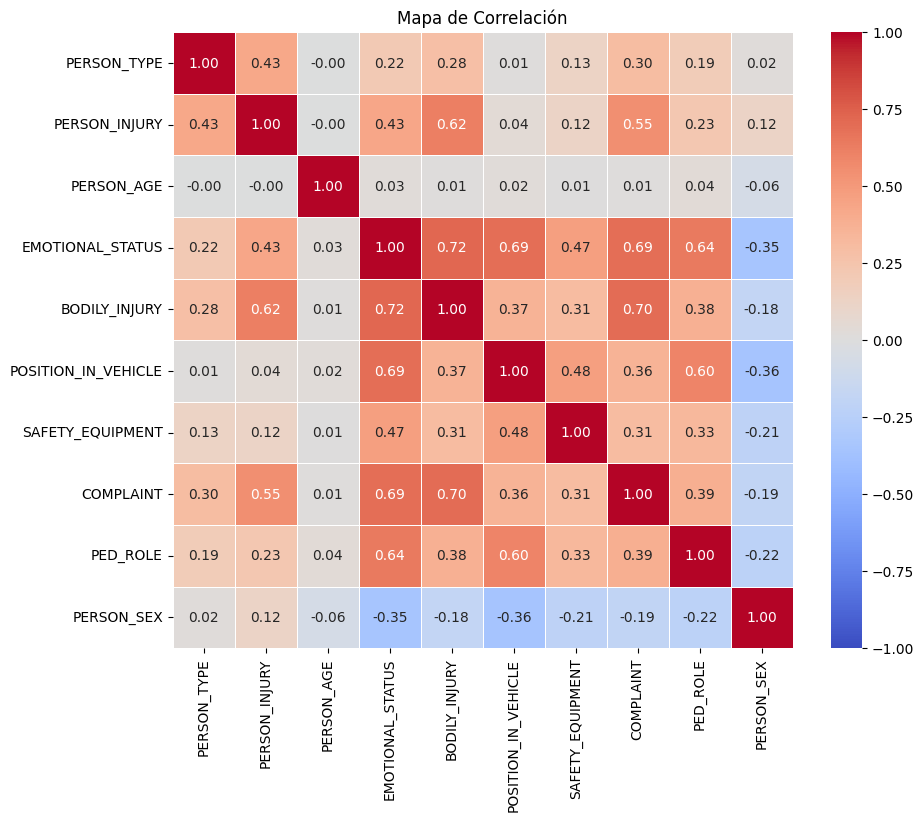

In [ ]:
# Crea un mapa de correlación con valores en el rango de -1 a 1.
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()